## 스무딩 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 시계열 데이터, 데이터 프레임, 원본 시계열 데이터 시각화

         Date      Value
0  2023-01-01   8.765035
1  2023-01-02  10.768410
2  2023-01-03   8.966320
3  2023-01-04  11.185200
4  2023-01-05   8.900407
..        ...        ...
95 2023-04-06   8.347880
96 2023-04-07   9.556004
97 2023-04-08   8.288859
98 2023-04-09  10.162290
99 2023-04-10   9.502679

[100 rows x 2 columns]


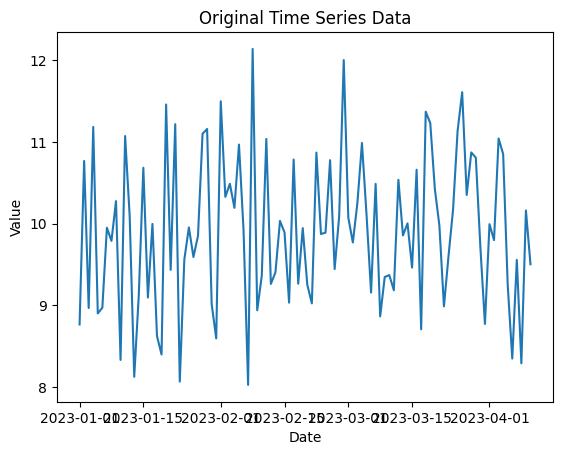

In [2]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) + 10 # 정규 분포를 따르는 데이터 생성

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})
print(data)

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.show()

### 이동 평균을 이용한 스무딩

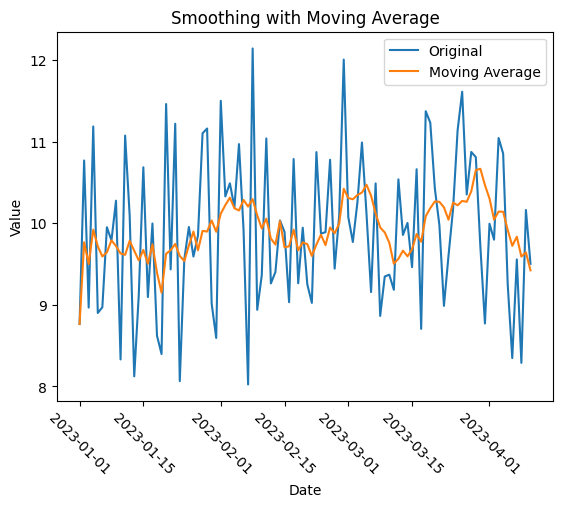

In [3]:
# 이동 평균 윈도우 크기 설정
window_size = 7

# 이동 평균 계산
data['MovingAverage'] = data['Value'].rolling(window=window_size, min_periods=1).mean()
# min_periods=1 은 최소한 하나의 유효한 값이 있는 구간에서도 평균을 계산하도록 설정합니다.

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Moving Average')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

### 스무딩 --> 지수평활법

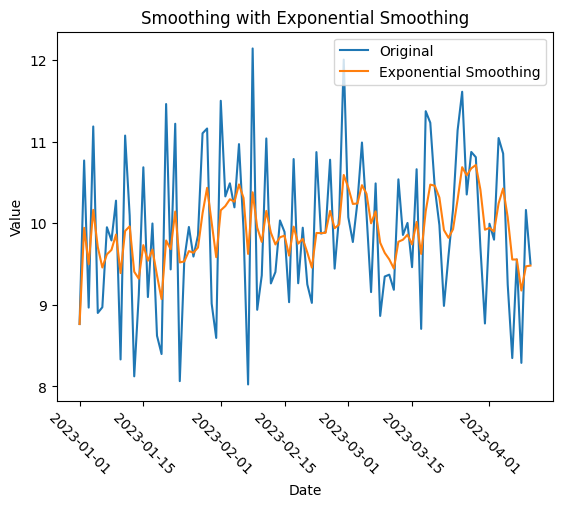

In [4]:
alpha = 0.3

# 지수평활법 계산
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'], data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Smoothing with Exponential Smoothing')
plt.xticks(rotation=-45)
plt.legend()
plt.show()